In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [3]:
print(tf.__version__)

2.17.0


In [4]:
df= keras.datasets.fashion_mnist.load_data()

In [5]:
(train_images, train_labels),(test_images, test_labels) = df

In [6]:
print("Train Images", train_images.shape)
print("Train Images", train_labels.shape)
print("Test Images", test_images.shape)
print("Test Images", test_labels.shape)

Train Images (60000, 28, 28)
Train Images (60000,)
Test Images (10000, 28, 28)
Test Images (10000,)


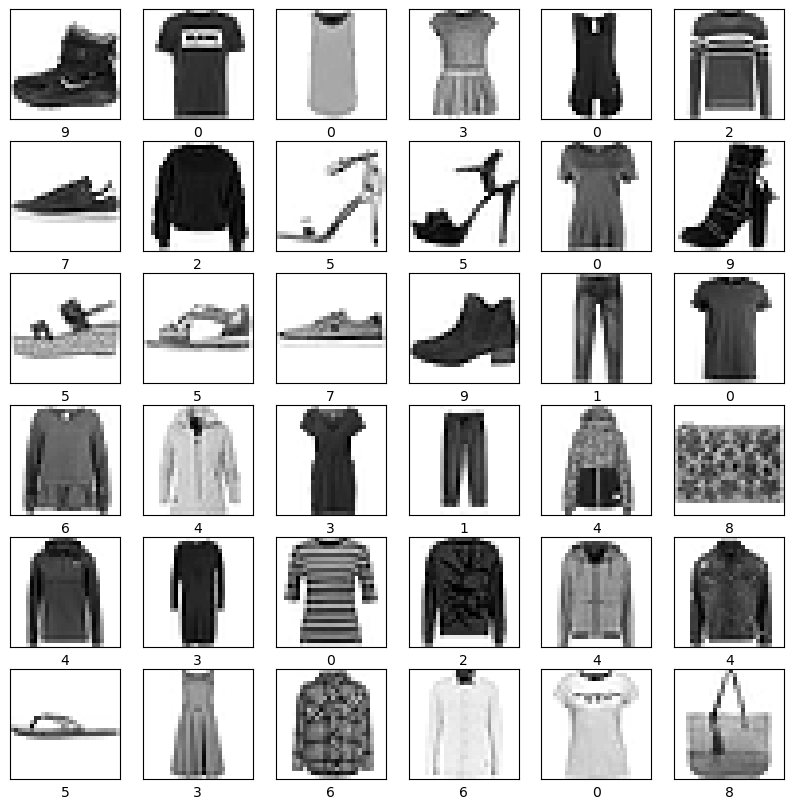

In [7]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

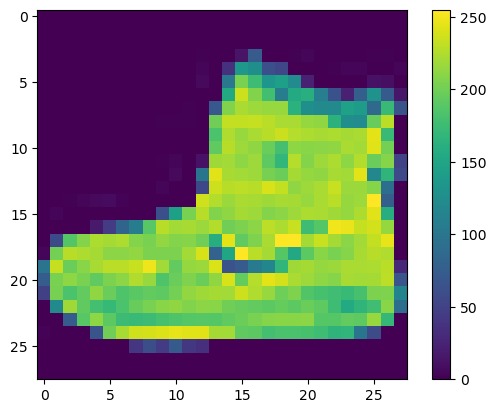

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 21

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [9]:
train_images= train_images/250
test_images= test_images/250

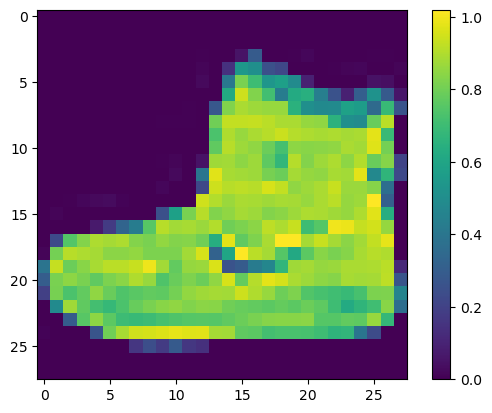

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [11]:
train_images = train_images.astype('float32')/ 255.0
test_images = test_images.astype('float32')/ 255.0


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.002 0.002 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.002 0.003 0.003 0.002 0.002 0.002 

<Figure size 640x480 with 0 Axes>

<Axes: >

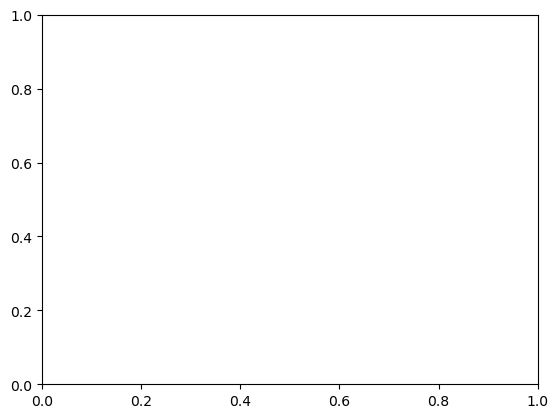

In [12]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in train_images[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

In [13]:
#create the model
model =tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')# output layers
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,098 (98.04 KB)

 Trainable params: 25,098 (98.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8155 - loss: 0.4954 - val_accuracy: 0.8208 - val_loss: 0.4817
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8290 - loss: 0.4719 - val_accuracy: 0.8281 - val_loss: 0.4778
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8318 - loss: 0.4570 - val_accuracy: 0.8319 - val_loss: 0.4686
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8357 - loss: 0.4494 - val_accuracy: 0.8356 - val_loss: 0.4629
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8453 - loss: 0.4278 - val_accuracy: 0.8360 - val_loss: 0.4511
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8456 - loss: 0.4229 - val_accuracy: 0.8398 - val_loss: 0.4364
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8501 - loss: 0.4111 - val_accuracy: 0.8508 - val_loss: 0.4201
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8529 - loss: 0

In [34]:
test_loss, test_acc =model.evaluate(test_images,test_labels,verbose=2)
print('\nTest loss:',test_loss)
print('\nTest accuracy:',test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8598 - loss: 0.3908

Test loss: 0.3907657861709595

Test accuracy: 0.8597999811172485


In [35]:
model.save('models/fashion_mnist_model.h5')

# Make prediction

In [36]:
#make prediction
test_images


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [37]:
test_images.shape

(10000, 28, 28, 1)

In [38]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [39]:
test_labels[50]

4

In [40]:
predictions[50]

array([6.1309125e-02, 1.0039703e-06, 2.8866598e-01, 1.3256341e-04,
       4.4540262e-01, 6.1592798e-10, 2.0276856e-01, 5.0040926e-12,
       1.7200473e-03, 2.7015800e-13], dtype=float32)

In [41]:
np.argmax(predictions[50])

4

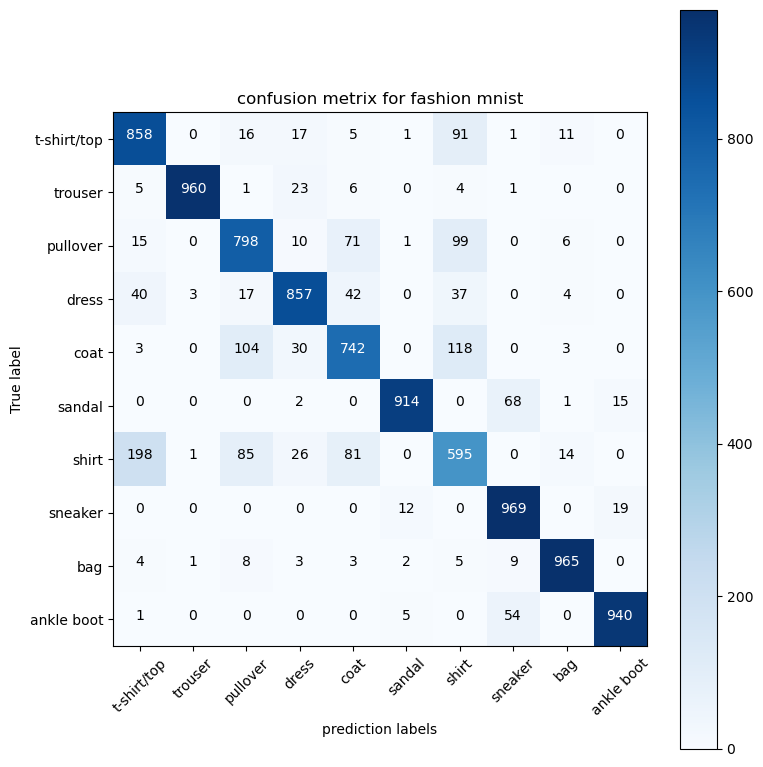

In [42]:
# draw a confusion metrices
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predicted_labels = np.argmax(predictions, axis =1)
cm = confusion_matrix(test_labels,predicted_labels)

class_labels = ['t-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

plt.figure(figsize=(8,8))
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion metrix for fashion mnist')
plt.colorbar()
tick_marks =np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels,rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('prediction labels')
plt.ylabel('True label')

thresh =cm.max()/2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment ="center",
                color="white" if cm[i,j]> thresh else "black")
plt.tight_layout()
plt.show()